# INFANT MORTALITY PREDICTIONS WITH MACHINE LEARNING

## Introduction

Infant mortality is the death of an infant within the first year of life and continues to be a very prominent issue within developed nations such as the United States. According to the Centers for Disease Control and Prevention (CDC), a total of 23,455 deaths occurred in children under the age of 1 year in 2015, which represents an increase of 240 deaths from the previous year. The infant mortality rate is an important marker of the overall health of a society. 

There are many determinants that impact infant mortality. The Linked Death files collected by the National Bureau of Economic Research from the National Vital Statistics System of the National Center for Health Statistics includes deaths to all infants born in the same calendar year for which the death certificate can be linked to a birth certificate in the denominator file. We will be working with the 2015 Linked Death files, the last calendar year for which such data is available.

The objective of this project was to create a machine learning classification model that would predict the top 3 causes of infant death based on 8 user feature inputs. The causes of death were categorized according to the International Classification of Diseases, Tenth Revision (ICD-10).

#### 1. Importing Relevant Packages

#### 2. Creating a Machine Learning Model

#### 3. Saving Model

#### 4. Making Predictions with Model

### Importing Relevant Packages

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import (
    GradientBoostingClassifier, 
    RandomForestClassifier,
    StackingClassifier,
    VotingClassifier
)
from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    confusion_matrix,
    classification_report, 
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_recall_fscore_support,
    average_precision_score,
    precision_score,
    recall_score,
)

import pickle

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

### Creating a Machine Learning Model

In [2]:
df_intx = pd.read_csv('df_intx.csv')
df_intx

,Birthweight (grams),Age at Death (days),Obstetric Estimate,Number of Record-Axis Conditions,Combined Gestation,Number of Entity-Axis Conditions,Five Minute APGAR,Place of Death and Descendent’s Status,Selected Causes of Infant Death
0,1559,4,3,4,3,4,3,1,70
1,3288,93,5,3,5,3,4,2,118
2,2438,0,7,1,7,1,1,1,118
3,2920,141,7,2,7,2,4,2,134
4,580,0,2,2,2,3,1,1,70
...,...,...,...,...,...,...,...,...,...
23352,3317,100,7,3,7,3,4,2,1
23353,774,1,2,3,2,4,3,1,70
23354,3080,83,7,1,7,1,4,2,134
23355,2325,0,5,1,5,1,3,1,70


              precision    recall  f1-score   support

           1       0.50      0.44      0.47       140
          23       0.00      0.00      0.00        30
          29       0.00      0.00      0.00        30
          33       0.00      0.00      0.00        53
          39       0.00      0.00      0.00        70
          46       0.00      0.00      0.00       109
          53       0.40      0.23      0.29       120
          63       0.00      0.00      0.00        43
          67       0.00      0.00      0.00        31
          70       0.78      0.87      0.82      2323
         109       0.50      0.15      0.24       569
         118       0.57      0.74      0.65      1199
         134       0.81      0.85      0.83       698
         137       0.00      0.00      0.00         4
         138       0.55      0.80      0.65       390
         158       0.00      0.00      0.00        31

    accuracy                           0.68      5840
   macro avg       0.26   

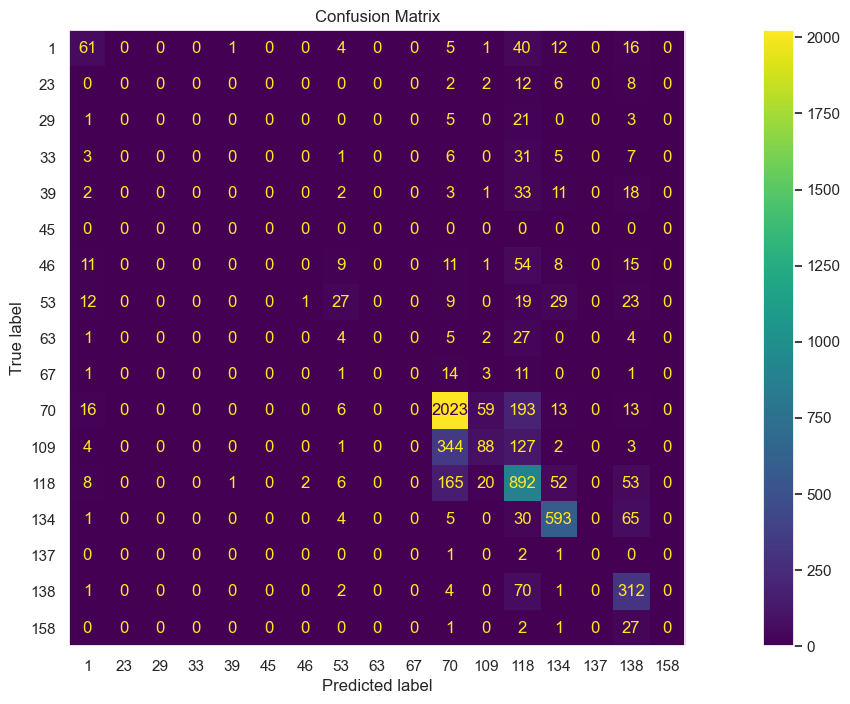

In [3]:
#Ensemble Majority Model using the VotingClassifier class

X = df_intx.drop('Selected Causes of Infant Death',axis=1)
y = df_intx['Selected Causes of Infant Death']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

rf = RandomForestClassifier(
    bootstrap= False, criterion= 'gini', max_depth= 20, max_features= 'log2', 
    min_samples_leaf= 2, min_samples_split= 10, n_estimators= 100,random_state=42)
gbc = GradientBoostingClassifier(
    criterion= 'squared_error', learning_rate= 0.1, loss= 'log_loss', max_depth= 5, 
    max_features= 'log2', min_samples_leaf= 0.1, min_samples_split= 0.1, n_estimators= 100, 
    subsample= 1.0,random_state=42)

ensemble = VotingClassifier(estimators=[('rf', rf),('gbc',gbc)], voting='soft')

ensemble.fit(X_train.values, y_train)

y_pred = ensemble.predict(X_test.values)
y_pred_train = ensemble.predict(X_train.values)

print(classification_report(y_test, y_pred))
print("Accuracy on training set: {:.4f}".format(ensemble.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(ensemble.score(X_test, y_test)))
print("Precision on training set:",precision_recall_fscore_support(y_train, y_pred_train, average='weighted')[0])
print("Precision on test set:",precision_recall_fscore_support(y_test, y_pred, average='weighted')[0])
print("Recall on training set:",precision_recall_fscore_support(y_train, y_pred_train, average='weighted')[1])
print("Recall on test set:",precision_recall_fscore_support(y_test, y_pred, average='weighted')[1])

cm = confusion_matrix(y_test,y_pred,labels = ensemble.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ensemble.classes_)
fig, ax = plt.subplots(figsize=(20, 8))
cmp.plot(ax=ax)
ax.set_title('Confusion Matrix')
ax.grid(False)
plt.show()

#### Same Model but Trained on Entire Dataframe 

              precision    recall  f1-score   support

           1       0.62      0.53      0.57       568
          23       0.00      0.00      0.00       101
          29       0.00      0.00      0.00       103
          33       1.00      0.02      0.04       198
          39       1.00      0.05      0.09       302
          45       0.00      0.00      0.00         3
          46       0.97      0.08      0.15       432
          53       0.63      0.29      0.40       534
          63       1.00      0.01      0.01       186
          67       1.00      0.03      0.06       102
          70       0.82      0.92      0.87      9240
         109       0.86      0.36      0.51      2296
         118       0.66      0.82      0.73      4873
         134       0.81      0.88      0.85      2752
         137       0.00      0.00      0.00        20
         138       0.63      0.91      0.75      1536
         158       0.00      0.00      0.00       111

    accuracy              

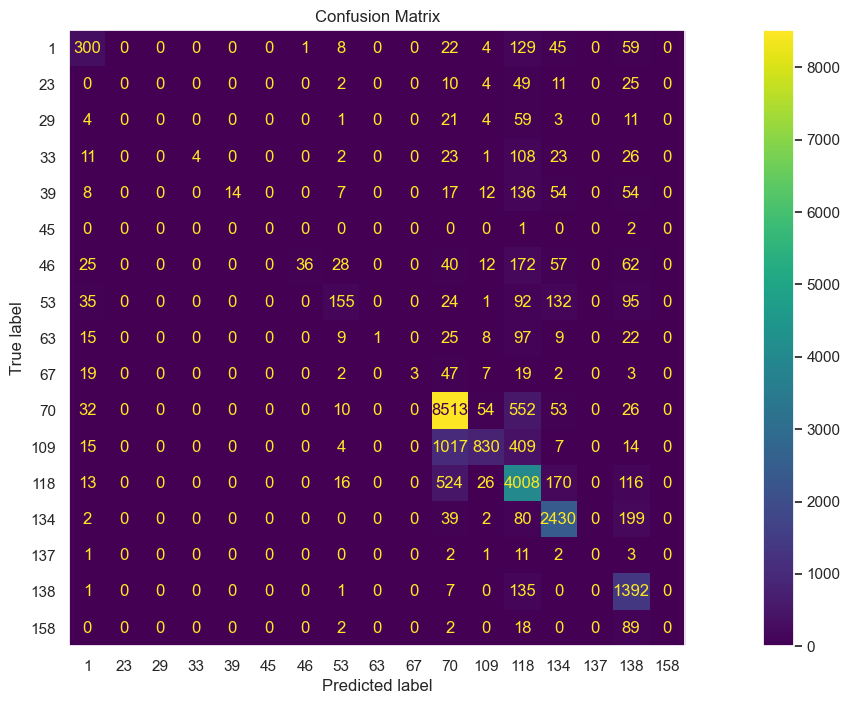

In [4]:
X = df_intx.drop('Selected Causes of Infant Death',axis=1)
y = df_intx['Selected Causes of Infant Death']

rf = RandomForestClassifier(
    bootstrap= False, criterion= 'gini', max_depth= 20, max_features= 'log2', 
    min_samples_leaf= 2, min_samples_split= 10, n_estimators= 100,random_state=42)
gbc = GradientBoostingClassifier(
    criterion= 'squared_error', learning_rate= 0.1, loss= 'log_loss', max_depth= 5, 
    max_features= 'log2', min_samples_leaf= 0.1, min_samples_split= 0.1, n_estimators= 100, 
    subsample= 1.0,random_state=42)

ensemble1 = VotingClassifier(estimators=[('rf', rf),('gbc',gbc)], voting='soft')

ensemble1.fit(X.values, y)

y_pred = ensemble1.predict(X.values)

print(classification_report(y, y_pred))
print(f'Accuracy score for Test: {accuracy_score(y, y_pred)}')
print("Precision:",precision_recall_fscore_support(y, y_pred, average='weighted')[0])
print("Recall:",precision_recall_fscore_support(y, y_pred, average='weighted')[1])


cm = confusion_matrix(y,y_pred,labels = ensemble1.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ensemble1.classes_)
fig, ax = plt.subplots(figsize=(20, 8))
cmp.plot(ax=ax)
ax.set_title('Confusion Matrix')
ax.grid(False)
plt.show()

### Saving Model

In [ ]:
# Saving model to pickle file
with open("ensemble1.pkl", "wb") as file: 
    pickle.dump(ensemble1, file)

In [8]:
# Opening saved model
with open("ensemble1.pkl", "rb") as file:
    loaded_ensemble1 = pickle.load(file)

### Making Predictions with Model

In [9]:
#Turn Output Labels into Strings
def predictions_to_strings(predictions):
    label_mapping = {
        1: 'Certain infectious and parasitic diseases',
        23: 'Neoplasms',
        29: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
        33: 'Endocrine, nutritional and metabolic diseases',
        39: 'Diseases of the nervous system',
        45: 'Diseases of the ear and mastoid process',
        46: 'Diseases of the circulatory system',
        53: 'Diseases of the respiratory system',
        63: 'Diseases of the digestive system',
        67: 'Diseases of the genitourinary system',
        70: 'Certain conditions originating in the perinatal period',
        109: 'Hemorrhagic and hematological disorders of newborn',
        118: 'Congenital malformations, deformations and chromosomal abnormalities',
        134: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
        137: 'All other diseases (Residual)',
        138: 'External causes of mortality',
        158: 'Other external causes'
    }
    
    # Convert integer predictions to strings using mapping
    string_predictions = [label_mapping[pred] for pred in predictions]
    
    return string_predictions

In [10]:
#Output top 3 predictions with corresponding probabilities
def top_3_predictions(new_data):
    predicted_probabilities = loaded_ensemble1.predict_proba(new_data)
    
    for i, probs in enumerate(predicted_probabilities):
        # Get indices of top 3 probabilities
        top3_indices = probs.argsort()[-3:][::-1]
        # Get corresponding class labels and probabilities
        top3_classes = loaded_ensemble1.classes_[top3_indices]
        top3_probs = probs[top3_indices] * 100  # Convert probabilities to percentages
        
        # Convert integer predictions to strings using the mapping
        top3_classes_strings = predictions_to_strings(top3_classes)
        
        # Print predictions for each sample
        print(f"Top 3 predictions for {new_data}:")
        for j, (pred_class, pred_class_string, pred_prob) in enumerate(zip(top3_classes, top3_classes_strings, top3_probs)):
            print(f"   Prediction {j + 1}: Class {pred_class_string}, Probability of {pred_prob:.2f}%")

#### Predicting various known patients

In [11]:
S = np.array([[1559,4,3,4,3,4,3,1]])#70
top_3_predictions(S)

Top 3 predictions for [[1559    4    3    4    3    4    3    1]]:
   Prediction 1: Class Certain conditions originating in the perinatal period, Probability of 44.80%
   Prediction 2: Class Congenital malformations, deformations and chromosomal abnormalities, Probability of 25.49%
   Prediction 3: Class Hemorrhagic and hematological disorders of newborn, Probability of 22.44%


In [12]:
D = np.array([[2325,0,5,1,5,1,3,1]])#70
top_3_predictions(D)

Top 3 predictions for [[2325    0    5    1    5    1    3    1]]:
   Prediction 1: Class Congenital malformations, deformations and chromosomal abnormalities, Probability of 66.86%
   Prediction 2: Class Certain conditions originating in the perinatal period, Probability of 24.03%
   Prediction 3: Class Diseases of the genitourinary system, Probability of 2.40%


In [13]:
E = np.array([[3011,127,6,2,6,2,4,1]])#134
top_3_predictions(E)

Top 3 predictions for [[3011  127    6    2    6    2    4    1]]:
   Prediction 1: Class External causes of mortality, Probability of 25.24%
   Prediction 2: Class Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified, Probability of 20.88%
   Prediction 3: Class Congenital malformations, deformations and chromosomal abnormalities, Probability of 20.86%


In [14]:
F = np.array([[3288,93,5,3,5,3,4,2]])#118
top_3_predictions(F)

Top 3 predictions for [[3288   93    5    3    5    3    4    2]]:
   Prediction 1: Class External causes of mortality, Probability of 36.49%
   Prediction 2: Class Congenital malformations, deformations and chromosomal abnormalities, Probability of 16.34%
   Prediction 3: Class Certain infectious and parasitic diseases, Probability of 11.50%


In [15]:
G = np.array([[2438,0,7,1,7,1,1,1]])#118
top_3_predictions(G)

Top 3 predictions for [[2438    0    7    1    7    1    1    1]]:
   Prediction 1: Class Congenital malformations, deformations and chromosomal abnormalities, Probability of 70.95%
   Prediction 2: Class Certain conditions originating in the perinatal period, Probability of 15.00%
   Prediction 3: Class Hemorrhagic and hematological disorders of newborn, Probability of 11.46%


In [16]:
H = np.array([[580,0,2,2,2,3,1,1]])#70
top_3_predictions(H)

Top 3 predictions for [[580   0   2   2   2   3   1   1]]:
   Prediction 1: Class Certain conditions originating in the perinatal period, Probability of 77.06%
   Prediction 2: Class Hemorrhagic and hematological disorders of newborn, Probability of 13.21%
   Prediction 3: Class Congenital malformations, deformations and chromosomal abnormalities, Probability of 8.86%


In [17]:
I = np.array([[3080,83,7,1,7,1,4,2]])#134
top_3_predictions(I)

Top 3 predictions for [[3080   83    7    1    7    1    4    2]]:
   Prediction 1: Class Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified, Probability of 95.33%
   Prediction 2: Class Diseases of the respiratory system, Probability of 1.78%
   Prediction 3: Class Congenital malformations, deformations and chromosomal abnormalities, Probability of 1.03%


## Conclusion

Infant mortality is one of the world's largest public health issues. While infant mortality rates have plummeted dramatically with industrialization and the advent of modern medicine, there is still much work to be done. The loss of a child brings tremendous suffering to the expecting parent(s), especially when the cause is not clear. 

There are many determinants that contribute to infant mortality. Healthcare is complex and there are rarely easy answers. However in this project we have attempted to create a simple model that allows the attending physician to provide some rapid and precise answers to the grieving parent(s) as to why their child did not survive. 


## Resources

https://www.nber.org/research/data/linked-birthinfant-death-cohort-data